In [ ]:
import json 
from GymMaze.CMaze import CMaze
import sys
import matplotlib.pyplot as plt 
import numpy as np
import os
import time
from random import sample 

In [ ]:
filename_env='US'
file_cur='filename for curiosity'
file_map='filename for map_elites'
file_cma='filename for cma_me'

In [13]:
# deserialize
with open(file_cur) as json_file:
    data_cur = json.load(json_file)
with open(file_map) as json_file:
    data_map = json.load(json_file)
with open(file_cma) as json_file:
    data_cma = json.load(json_file)

In [15]:
data_map=data_map['archive_traj']
data_cur=data_cur['archive_traj']
data_cma=data_cma['archive_traj']

In [57]:
DTF,R,L=[],[],[]
for (feature,r) in data_cur:
    DTF.append(feature)
    R.append(r)
    L.append('cur')
for (feature,r) in data_map:
    DTF.append(feature)
    R.append(r)
    L.append('map')
for (feature,r) in data_cma:
    DTF.append(feature)
    R.append(r)
    L.append('cma')
DTF=np.array(DTF)

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(DTF)
R/=np.max(R)

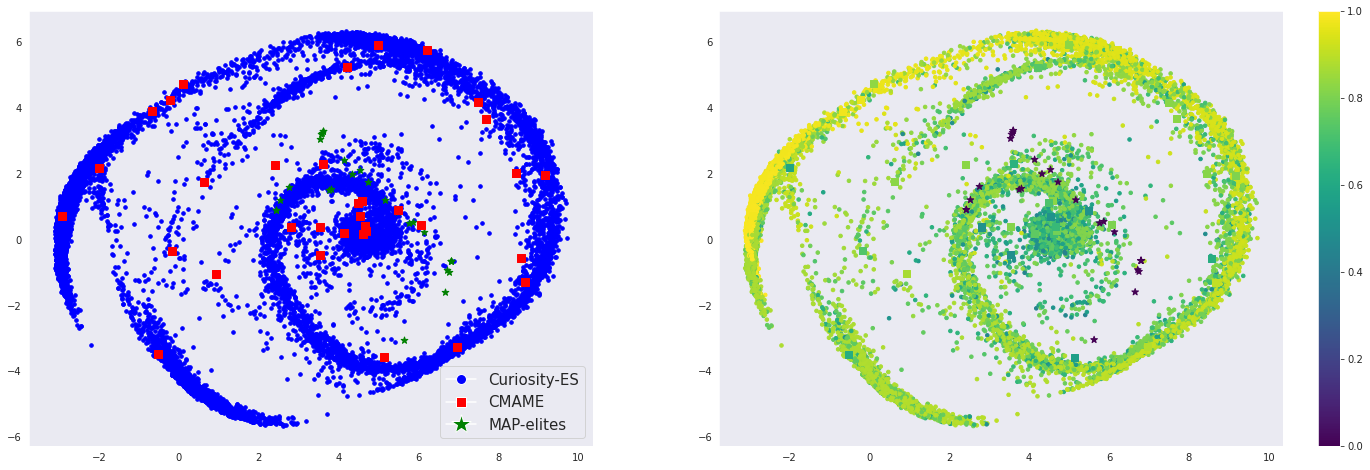

In [64]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('dark')
# figure PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), gridspec_kw={'width_ratios': [0.8, 1]})

Markers=[]
for (x,y),s,l in zip(principalComponents,R,L):
	if l=='cma':
		ax1.scatter(x,y, s = 50, c='r',alpha=1, marker='s')
		Markers.append('s') 
	elif l=='map':
		ax1.scatter(x,y, s = 50, c='g',alpha=1, marker='*')
		Markers.append('*')
	elif l=='cur':
		ax1.scatter(x,y, s = 50, c='b',alpha=1, marker='.')
		Markers.append('.')

SC=mscatter(ax=ax2,x=principalComponents[:,0], y=principalComponents[:,1], s = 50, c=R ,alpha=1,cmap='viridis', m=Markers) 
# plt.clim(np.min(R), np.max(R))
ax1_legend = [Line2D([0], [0], marker='.', color='w', label='Curiosity-ES',
						  markerfacecolor='b', markersize=20),
					Line2D([0], [0], marker='s', color='w', label='CMAME',
						  markerfacecolor='r', markersize=10),
						  Line2D([0], [0], marker='*', color='w', label='MAP-elites',
						  markerfacecolor='g', markersize=20)]
ax1.legend(handles=ax1_legend, loc='lower right',prop={'size': 15})
cbar = fig.colorbar(SC)
plt.savefig('./pdf/PCA_US.pdf')
plt.savefig('./pdf/PCA_US.png')


In [23]:
import matplotlib.pyplot as plt

def mscatter(x,y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    ax = ax or plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc